<a href="https://www.kaggle.com/code/sharanharsoor/wordnet-relationships-semantic-processing?scriptVersionId=125443139" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Semantic Processing 
Semantic processing is the next step in understanding natural language text. It involves analyzing the meaning of a sentence beyond the individual words and their grammatical structure. In semantic processing, we focus on the relationships between words, phrases, and clauses in a sentence and how they relate to the overall meaning of the sentence. Semantic processing can be used for a variety of tasks such as information retrieval, question answering, text summarization, and many others.

Semantic study is about interpreting the intent behind a statement, comprehending ambiguous words, recognizing synonyms, detecting sarcasm, etc.

At high level Semantic Processing is done by using 
1. Knowledge graphs
2. Distributional semantics
3. Topic modeling

In this notebook will look into understading Knowledge graphs using WordNet.

# Knowledge graphs
A knowledge graph is a type of graph data structure consisting of a defined set of vertices (also known as nodes or points) that are connected by edges. Let’s learn about Knowledge graphs in the upcoming video.

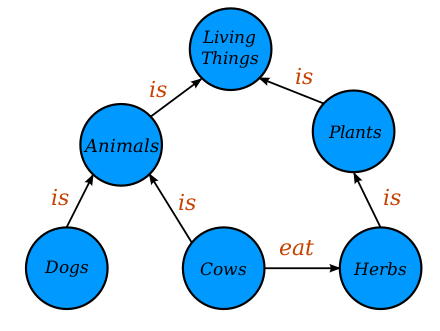 <br>
[source](https://en.wikipedia.org/wiki/Knowledge_graph) <br>

The different types of knowledge graphs include:

**WordNet**: A lexical database of semantic relations between words developed by Princeton University

**ConceptNet**: A freely available semantic network created by MIT to help computers understand human word usage.

**UMLS**: The Unified Medical Language System, a set of files and software bringing together various health and biomedical vocabularies and standards to enable computer system interoperability.

**In this notebook we will look into WordNet**


# What is [WordNet](https://wordnet.princeton.edu/) ?

WordNet to resolve word sense ambiguity. Developed by Princeton University, WordNet is a comprehensive English word database and a part of NLTK (Natural Language ToolKit)

### wordnet [search](http://wordnetweb.princeton.edu/perl/webwn) <br>

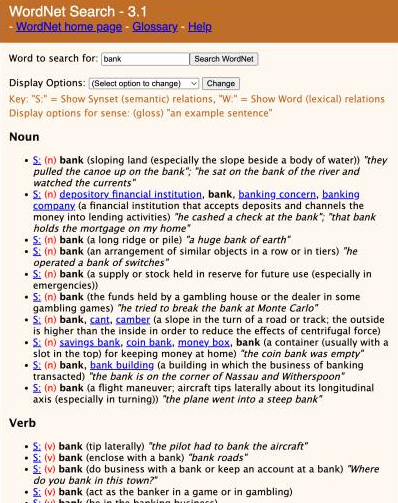 <br>

The screenshot from WordNet’s website shows each sense of a word grouped into their nouns and verbs, referred to as a synset. <br>
Each sense has a gloss or definition and an example sentence, such as the first verb sense of the word "bank" with the meaning "tip literally" and the example sentence "the pilot had to bank the aircraft." Unlike a dictionary with definitions, WordNet is unique in terms of the relationships between the different senses of a word. <br>
<br>

The types of relationships between different words can be grouped as follows: <br>
**Is a relation:** <br>

**Synonym**: A relation between two similar concepts <br>
    **Example**: “large” is a synonym of “big.” <br>

**Antonym**: A relation between two opposite concepts <br>
    **Example**: “large” is an antonym of “small.” <br>
    
**Hypernym**: A relation between a concept and its superordinate. A superordinate is all-encompassing. <br>
    **Example**: “fruits” is the hypernym of “mango.” <br>
    
**Hyponym**: A relation between a concept and its subordinate <br>
    **Example**: “apple” is the hyponym of “fruits.” <br>


You can refer to the diagram given below to understand hyponyms and hypernyms. Any word connected with its hypernyms has an “is a” relationship.

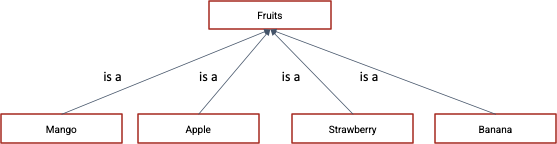 <br>
<br>

**has part relation**: <br>

**Holonym**: A relation between a whole and its parts<br>
**Example**: “face” is the holonym of “eyes.”<br>

**Meronym**: A relation between a part and its whole<br>
**Example**: “eyes” is the meronym of the “human body.”<br>

“has part” relationship.

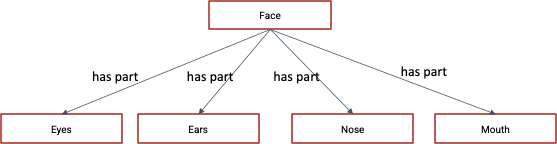 <br>


# WordNet Graph that will be used to explain the concepts.


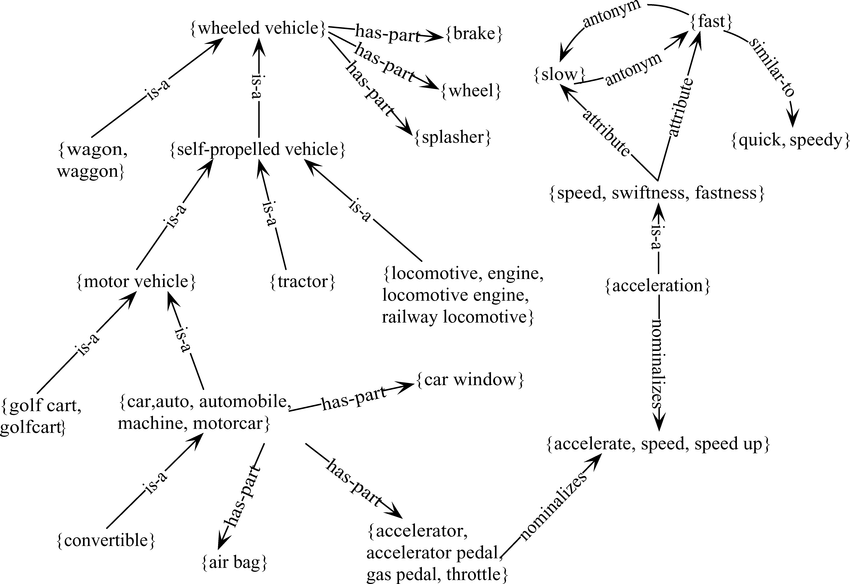<br>
[source](https://www.researchgate.net/figure/An-excerpt-of-the-WordNet-semantic-network_fig2_220566219) <br>

# code demo

In [1]:
# Install and load NLTK
#!pip install nltk

import nltk
nltk.download('omw-1.4')
from nltk import download
nltk.download('wordnet')
nltk.download('wordnet2022')
from nltk.corpus import wordnet

! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


## Synonym (synsets)

In [2]:
# Synsets (synonyms sets)

tractor = wordnet.synsets('tractor')
tractor

# The word tractor have got 2 senses that are of noun forms. 

[Synset('tractor.n.01'), Synset('tractor.n.02')]

In [3]:
# Definitions of senses

[syn.definition() for syn in tractor]

['a wheeled vehicle with large wheels; used in farming and other applications',
 'a truck that has a cab but no body; used for pulling large trailers or vans']

## Antonyms

In [4]:
syn = list()
ant = list()
for synset in wordnet.synsets("good"):
   for lemma in synset.lemmas():
      syn.append(lemma.name())    #add the synonyms
      if lemma.antonyms():    #When antonyms are available, add them into the list
          ant.append(lemma.antonyms()[0].name())
print('Synonyms: ' + str(syn))
print('Antonyms: ' + str(ant))

Synonyms: ['good', 'good', 'goodness', 'good', 'goodness', 'commodity', 'trade_good', 'good', 'good', 'full', 'good', 'good', 'estimable', 'good', 'honorable', 'respectable', 'admirable', 'beneficial', 'good', 'good', 'good', 'just', 'upright', 'adept', 'expert', 'good', 'practiced', 'proficient', 'skillful', 'skilful', 'good', 'dear', 'good', 'near', 'dependable', 'good', 'safe', 'secure', 'good', 'right', 'ripe', 'good', 'well', 'effective', 'good', 'in_effect', 'in_force', 'good', 'good', 'serious', 'good', 'sound', 'good', 'salutary', 'good', 'honest', 'good', 'unspoiled', 'unspoilt', 'good', 'well', 'good', 'thoroughly', 'soundly', 'good']
Antonyms: ['evil', 'evilness', 'bad', 'badness', 'bad', 'evil', 'ill']


## Hypernyms

In [5]:
# Hypernyms: Relation between a concept and its superordinate
# in this case we are cheking the synset of the 1st defination of the tractor (tractor have 2 definations)

tractor = wordnet.synset('tractor.n.01')
tractor.hypernyms()

[Synset('self-propelled_vehicle.n.01')]

from the image the tractor is a self-propelled_vehicle (this is "is a " relationship)


In [6]:
self_propelled_vehicle = wordnet.synset('self-propelled_vehicle.n.01')
self_propelled_vehicle.hypernyms()

[Synset('wheeled_vehicle.n.01')]

## meronyms

In [7]:
# Meronyms: Relation between a part and its whole

wheeled_vehicle = wordnet.synset('wheeled_vehicle.n.01')
wheeled_vehicle.part_meronyms()

[Synset('axle.n.01'),
 Synset('brake.n.01'),
 Synset('splasher.n.01'),
 Synset('wheel.n.01')]

## hyponyms

In [8]:
# Hyponyms: Relation between a concept and its subordinate

wheeled_vehicle.hyponyms()

[Synset('baby_buggy.n.01'),
 Synset('bicycle.n.01'),
 Synset('boneshaker.n.01'),
 Synset('car.n.02'),
 Synset('handcart.n.01'),
 Synset('horse-drawn_vehicle.n.01'),
 Synset('motor_scooter.n.01'),
 Synset('rolling_stock.n.01'),
 Synset('scooter.n.02'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('skateboard.n.01'),
 Synset('trailer.n.04'),
 Synset('tricycle.n.01'),
 Synset('unicycle.n.01'),
 Synset('wagon.n.01'),
 Synset('wagon.n.04'),
 Synset('welcome_wagon.n.01')]

## holonyms

In [9]:
# Holonyms: Relation between whole and its parts (check the image for relationship)

axle = wordnet.synset('axle.n.01')
axle.part_holonyms()

[Synset('wheeled_vehicle.n.01')]

In [10]:
# hyponyms (check the image for relationship)

self_propelled_vehicle.hyponyms()

[Synset('armored_vehicle.n.01'),
 Synset('carrier.n.02'),
 Synset('forklift.n.01'),
 Synset('locomotive.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('personnel_carrier.n.01'),
 Synset('reconnaissance_vehicle.n.01'),
 Synset('recreational_vehicle.n.01'),
 Synset('streetcar.n.01'),
 Synset('tracked_vehicle.n.01'),
 Synset('tractor.n.01'),
 Synset('weapons_carrier.n.01')]

In [11]:
# hyponyms (check the image for relationship)

motor_vehicle = wordnet.synset('motor_vehicle.n.01')
motor_vehicle.hyponyms()

[Synset('amphibian.n.01'),
 Synset('bloodmobile.n.01'),
 Synset('car.n.01'),
 Synset('doodlebug.n.01'),
 Synset('four-wheel_drive.n.01'),
 Synset('go-kart.n.01'),
 Synset('golfcart.n.01'),
 Synset('hearse.n.01'),
 Synset('motorcycle.n.01'),
 Synset('snowplow.n.01'),
 Synset('truck.n.01')]

In [12]:
# meronyms (check the image for relationship)

car = wordnet.synset('car.n.01')
car.part_meronyms()

[Synset('accelerator.n.01'),
 Synset('air_bag.n.01'),
 Synset('auto_accessory.n.01'),
 Synset('automobile_engine.n.01'),
 Synset('automobile_horn.n.01'),
 Synset('buffer.n.06'),
 Synset('bumper.n.02'),
 Synset('car_door.n.01'),
 Synset('car_mirror.n.01'),
 Synset('car_seat.n.01'),
 Synset('car_window.n.01'),
 Synset('fender.n.01'),
 Synset('first_gear.n.01'),
 Synset('floorboard.n.02'),
 Synset('gasoline_engine.n.01'),
 Synset('glove_compartment.n.01'),
 Synset('grille.n.02'),
 Synset('high_gear.n.01'),
 Synset('hood.n.09'),
 Synset('luggage_compartment.n.01'),
 Synset('rear_window.n.01'),
 Synset('reverse.n.02'),
 Synset('roof.n.02'),
 Synset('running_board.n.01'),
 Synset('side_curtain_airbag.n.01'),
 Synset('stabilizer_bar.n.01'),
 Synset('sunroof.n.01'),
 Synset('tail_fin.n.02'),
 Synset('third_gear.n.01'),
 Synset('window.n.02')]

# **Happy Learning**